In [35]:
import requests
from bs4 import BeautifulSoup

# アクセスしたいWebサイトのURL
url = 'https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view='

# Webサーバにリクエストを出す
r = requests.get(url)

# HTMLソースをBeautifulSoupオブジェクトに変換
soup = BeautifulSoup(r.text, 'html.parser')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [36]:
detas = soup.find_all('tr', style="text-align:right;")
for index, data in enumerate(detas):
    a_tag = data.find('a')
    if a_tag:
        day = a_tag.text
        print(day)
    else:
        print("aタグが見つかりませんでした")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [37]:
import sqlite3

# DBファイルを保存するためのファイルパス
path = '/Users/takayuki/Lecture/ds-programming'

# DBファイル名
db_name = 'sleeplv.sqlite'

# DBに接続する
con = sqlite3.connect(path + '/' + db_name)

# SQLを実行するためのオブジェクトを取得
cur = con.cursor()

# テーブルを作成するSQL
sql_create_table = '''
    CREATE TABLE IF NOT EXISTS sleeplv (
        day TEXT,
        hpa REAL,
        Precipitation TEXT,
        temp_av REAL,
        temp_max REAL,
        temp_min REAL,
        humidity_av TEXT,
        suntime TEXT
    );
'''

# CREATE TABLE IF NOT EXISTS ensures that the table is created only if it doesn't already exist
cur.execute(sql_create_table)

In [38]:
from bs4 import BeautifulSoup
import requests #HTTP操作用
import time


# アクセスしたいWebサイトのURL
url = 'https://www.data.jma.go.jp/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=&view='

# Webサーバにリクエストを出す．レスポンスを変数に格納しておく
r = requests.get(url)


soup = BeautifulSoup(r.text, 'html.parser') # HTMLソースをBeautifulSoupオブジェクトに変換する（プログラムで扱いやすくするため）
print(type(soup))



detas = soup.find_all('tr', style="text-align:right;")
index = 0
while index < len(detas):
    a_tag = detas[index].find('a')
    if a_tag:
        day = a_tag.text
        print(day)
        temp = detas[index].find_all('td', class_="data_0_0")
        if temp:
            hpa = temp[0].text
            Precipitation = temp[2].text
            temp_av = temp[7].text
            temp_max = temp[8].text
            temp_min = temp[9].text
            humidity_av = temp[10].text
            humidity_min = temp[11].text
            suntime = temp[17].text
            print(hpa,Precipitation,temp_av,temp_max,humidity_av,humidity_min,suntime)
        else:
            print("必要な要素が見つかりませんでした")
    else:
        print("aタグが見つかりませんでした")
    index += 1


import sqlite3


!pwd


# wDBファイルを保存するためのファイルパス
path = '/Users/takayuki/Lecture/ds-programming'

# DBファイル名
db_name = 'sleeplv.sqlite'

# DBに接続する
con = sqlite3.connect(path + db_name)

# SQLを実行するためのオブジェクトを取得
cur = con.cursor()

# テーブルを作成するSQL
#  CREATE TABLE テーブル名（カラム名 型，...）;
sql_create_table_DSprogHW = '''
    CREATE TABLE sleeplv (
        day INTEGER,
        hpa REAL,
        Precipitation TEXT,
        temp_av REAL,
        temp_max REAL,
        temp_min IREAL,
        humidity_av TEXT,
        suntime TEXT
    );
'''


# # 4．SQLを実行する

<class 'bs4.BeautifulSoup'>
1
1012.3 -- 6.4 54 2.0 4.0 --
2
1015.6 -- 4.1 60 1.7 3.1 --
3
1015.5 -- 4.1 58 2.5 6.3 --
4
1018.2 -- 4.7 53 1.9 3.8 --
5
1016.3 0.0 5.7 64 1.9 3.8 --
6
1008.8 1.0 7.1 77 2.2 4.8 --
7
1004.1 -- 7.1 60 2.7 8.2 --
8
1016.3 -- 6.0 49 2.5 4.8 --
9
1017.0 -- 6.4 66 1.6 3.3 --
10
1018.5 -- 7.2 65 1.4 4.1 --
11
1019.6 0.5 11.3 74 2.1 4.5 --
12
1007.6 15.5 9.7 92 2.1 4.7 --
13
1021.2 -- 7.3 52 2.8 5.0 --
14
1024.3 -- 6.5 62 1.7 3.3 --
15
1011.8 1.0 7.1 82 2.1 8.4 --
16
1001.4 0.0 10.8 71 3.0 8.7 --
17
1007.5 -- 5.9 36 3.5 7.2 --
18
1020.5 -- 3.8 36 2.6 5.5 --
19
1020.2 -- 3.4 53 1.6 3.1 --
20
1008.7 -- 4.6 59 1.6 3.5 --
21
1008.3 -- 3.3 41 2.8 6.4 --
22
1015.0 -- 1.5 38 2.6 5.9 --
23
1023.8 -- 0.1 47 1.8 4.4 --
24
1023.9 -- 2.0 55 1.6 2.9 --
25
1018.2 -- 1.0 56 1.7 3.6 --
26
1019.2 -- 2.6 58 2.4 5.8 --
27
1022.5 -- 4.3 50 2.8 6.2 --
28
1022.6 -- 4.4 56 1.9 3.3 --
29
1018.2 -- 2.2 61 1.6 3.4 --
30
1017.3 -- 4.4 63 1.6 4.7 --
31
1004.0 1.5 5.8 79 1.4 3.5 --


67423.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/takayuki/dsfinalpro


In [39]:
pip install pandas

67433.10s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd

In [41]:
#csvファイルの読み込み
df=pd.read_csv('/Users/takayuki/dsfinalpro/sleeplvel.csv')

In [42]:
df

,sleep_time,falling_asleep,utouto,suyasuya,gussuri,day
0,356,11,12,62,26,1
1,411,24,24,22,54,2
2,510,11,30,42,28,3
3,342,41,51,19,30,4
4,367,32,72,19,9,5
5,423,29,13,44,43,6
6,456,43,27,23,50,7
7,471,27,15,27,58,8
8,428,26,22,17,61,9
9,329,19,34,51,15,10


In [43]:
import sqlite3
import csv

# データベースに接続
conn = sqlite3.connect('sleep_level.db')
cursor = conn.cursor()

# テーブル作成
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sleep_table (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        sleep_time INTEGER,
        falling_asleep INTEGER,
        utouto INTEGER,
        suyasuya INTEGER,
        gussuri INTEGER,
        day INTEGER
    )
''')

# CSVファイルからデータを読み込んでインサート
with open('/Users/takayuki/dsfinalpro/sleeplvel.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO sleep_table (sleep_time, falling_asleep, utouto, suyasuya, gussuri, day)
            VALUES (?, ?, ?, ?, ?, ?)
        ''', (row['sleep_time'], row['falling_asleep'], row['utouto'], row['suyasuya'], row['gussuri'], row['day']))

# 変更を保存
conn.commit()

# 接続を閉じる
conn.close()


In [22]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


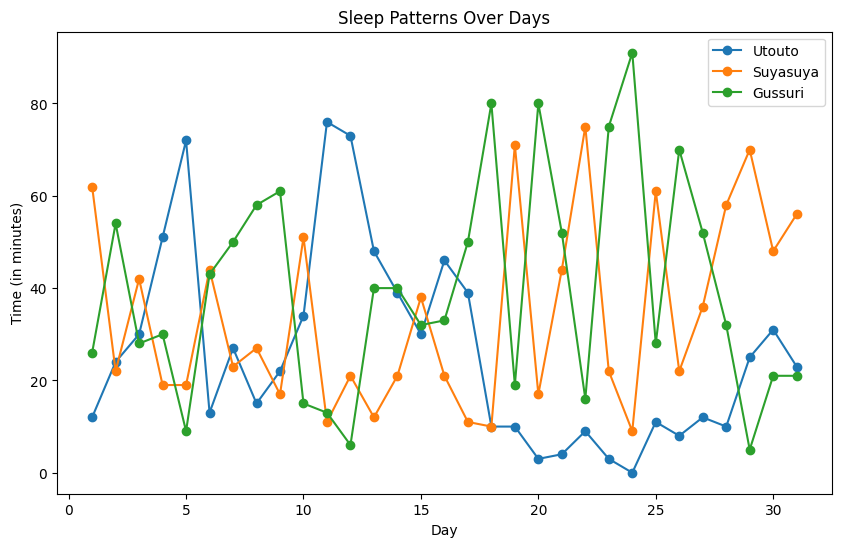

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_file_path = '/Users/takayuki/dsfinalpro/sleeplv.csv'

# CSVファイルの読み込み
df = pd.read_csv(csv_file_path)

# グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# day列をx軸に、他の列をy軸にして折れ線グラフを描画
plt.plot(df['day'], df['utouto'], marker='o', linestyle='-', label='Utouto')
plt.plot(df['day'], df['suyasuya'], marker='o', linestyle='-', label='Suyasuya')
plt.plot(df['day'], df['gussuri'], marker='o', linestyle='-', label='Gussuri')

# グラフにタイトルや軸ラベルを追加
plt.title('Sleep Patterns Over Days')
plt.xlabel('Day')
plt.ylabel('Time (in minutes)')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()


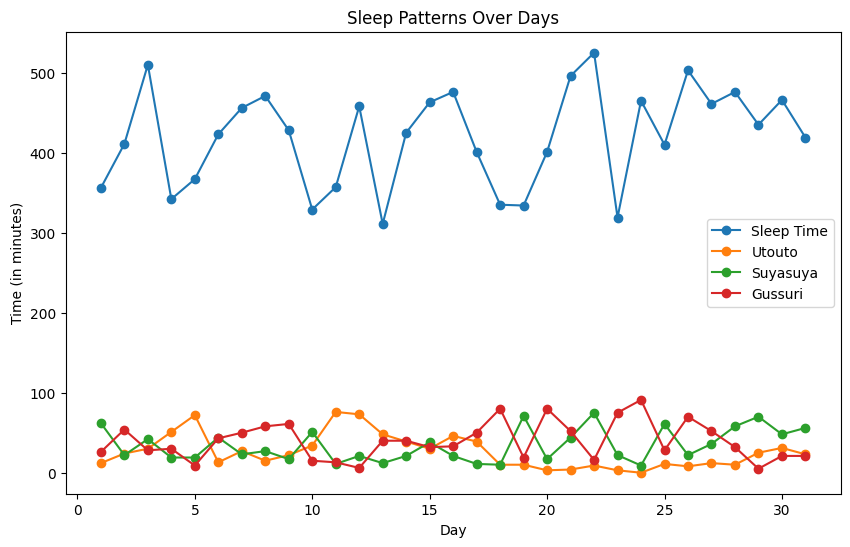

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_file_path = '/Users/takayuki/dsfinalpro/sleeplv.csv'

# CSVファイルの読み込み
df = pd.read_csv(csv_file_path)

# グラフの描画
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# day列をx軸に、他の列をy軸にして折れ線グラフを描画
plt.plot(df['day'], df['sleep_time'], marker='o', linestyle='-', label='Sleep Time')
plt.plot(df['day'], df['utouto'], marker='o', linestyle='-', label='Utouto')
plt.plot(df['day'], df['suyasuya'], marker='o', linestyle='-', label='Suyasuya')
plt.plot(df['day'], df['gussuri'], marker='o', linestyle='-', label='Gussuri')

# グラフにタイトルや軸ラベルを追加
plt.title('Sleep Patterns Over Days')
plt.xlabel('Day')
plt.ylabel('Time (in minutes)')

# 凡例の表示
plt.legend()

# グラフの表示
plt.show()


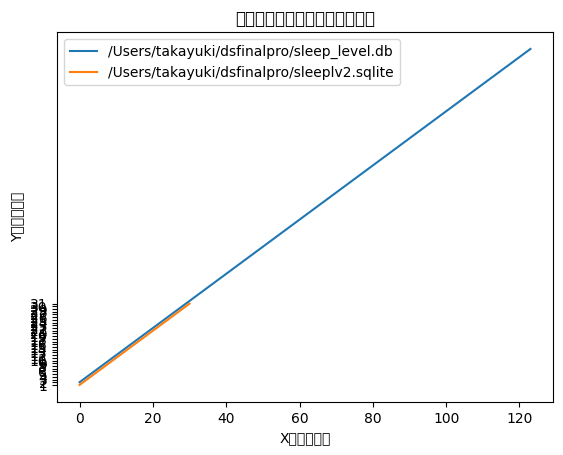

In [29]:
import sqlite3
import matplotlib.pyplot as plt

# データベース1への接続
conn1 = sqlite3.connect('/Users/takayuki/dsfinalpro/sleep_level.db')
cursor1 = conn1.cursor()

# データベース2への接続
conn2 = sqlite3.connect('/Users/takayuki/dsfinalpro/sleeplv2.sqlite')
cursor2 = conn2.cursor()

# データの取得
cursor1.execute('SELECT * FROM sleep_table')
data1 = cursor1.fetchall()

cursor2.execute('SELECT * FROM sleeplv')
data2 = cursor2.fetchall()

# 接続を閉じる
conn1.close()
conn2.close()

# データの加工
# ここでデータの比較や必要な処理を行います

# データの折れ線グラフ作成
x_values1 = range(len(data1))  # 仮の x 軸の値 (データベース1のサイズに合わせる)
x_values2 = range(len(data2))  # 仮の x 軸の値 (データベース2のサイズに合わせる)

y_values1 = [row[] for row in data1]  # データベース1からのデータ
y_values2 = [row[0] for row in data2]  # データベース2からのデータ

plt.plot(x_values1, y_values1, label='/Users/takayuki/dsfinalpro/sleep_level.db')
plt.plot(x_values2, y_values2, label='/Users/takayuki/dsfinalpro/sleeplv2.sqlite')

# グラフの装飾
plt.xlabel('X軸のラベル')
plt.ylabel('Y軸のラベル')
plt.title('データベース比較折れ線グラフ')
plt.legend()

# グラフの表示
plt.show()


ValueError: x and y must have same first dimension, but have shapes (124,) and (31,)

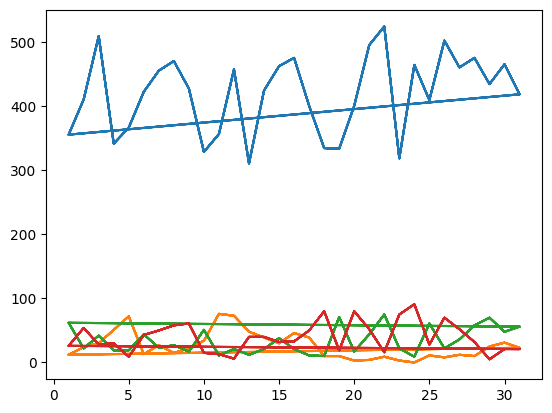

In [34]:
import sqlite3
import matplotlib.pyplot as plt

# データベース1への接続
conn1 = sqlite3.connect('/Users/takayuki/dsfinalpro/sleep_level.db')
cursor1 = conn1.cursor()

# データベース2への接続
conn2 = sqlite3.connect('/Users/takayuki/dsfinalpro/sleeplv2.sqlite')
cursor2 = conn2.cursor()

# データの取得
cursor1.execute('SELECT sleep_time, utouto, suyasuya, gussuri, day FROM sleep_table')
data1 = cursor1.fetchall()

cursor2.execute('SELECT day, hpa, Precipitation, temp_av, temp_max, temp_min, humidity_av, suntime FROM sleeplv')
data2 = cursor2.fetchall()

# 接続を閉じる
conn1.close()
conn2.close()

# データの加工
# ここでデータの比較や必要な処理を行います

# データの折れ線グラフ作成
x_values1 = [row[4] for row in data1]  # データベース1のday列

y_values1_sleep_time = [row[0] for row in data1]  # データベース1のsleep_time列
y_values1_utouto = [row[1] for row in data1]  # データベース1のutouto列
y_values1_suyasuya = [row[2] for row in data1]  # データベース1のsuyasuya列
y_values1_gussuri = [row[3] for row in data1]  # データベース1のgussuri列

# データベース2のday以外の要素
y_values2_hpa = [row[1] for row in data2]  # データベース2のhpa列
y_values2_Precipitation = [row[2] for row in data2]  # データベース2のPrecipitation列
y_values2_temp_av = [row[3] for row in data2]  # データベース2のtemp_av列
y_values2_temp_max = [row[4] for row in data2]  # データベース2のtemp_max列
y_values2_temp_min = [row[5] for row in data2]  # データベース2のtemp_min列
y_values2_humidity_av = [row[6] for row in data2]  # データベース2のhumidity_av列
y_values2_suntime = [row[7] for row in data2]  # データベース2のsuntime列

# 折れ線グラフの作成
plt.plot(x_values1, y_values1_sleep_time, label='sleep_time (DB1)')
plt.plot(x_values1, y_values1_utouto, label='utouto (DB1)')
plt.plot(x_values1, y_values1_suyasuya, label='suyasuya (DB1)')
plt.plot(x_values1, y_values1_gussuri, label='gussuri (DB1)')

plt.plot(x_values1, y_values2_hpa, label='hpa (DB2)')
plt.plot(x_values1, y_values2_Precipitation, label='Precipitation (DB2)')
plt.plot(x_values1, y_values2_temp_av, label='temp_av (DB2)')
plt.plot(x_values1, y_values2_temp_max, label='temp_max (DB2)')
plt.plot(x_values1, y_values2_temp_min, label='temp_min (DB2)')
plt.plot(x_values1, y_values2_humidity_av, label='humidity_av (DB2)')
plt.plot(x_values1, y_values2_suntime, label='suntime (DB2)')

# グラフの装飾
plt.xlabel('day')
plt.ylabel('Values')
plt.title('データベース比較折れ線グラフ')
plt.legend()

# グラフの表示
plt.show()
